### Get all imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Always use display to print your dataframes
from IPython.display import display

### Load the data

In [3]:
df_train = pd.read_csv("../Data/Train.csv")
df_test = pd.read_csv("../Data/Test.csv")
df_train.head()

# If profession is NaN, it could mean that the person in unemployed

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


### Check for NaNs

In [4]:
print("TRAIN")
display(df_train.isnull().sum())

TRAIN


ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [5]:
print("TEST")
display(df_test.isnull().sum())

TEST


ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

### Check if any row is repeated (Hint: No repetitions)

In [6]:
print("Number of Unique rows: ", df_train["ID"].nunique(), "\tNumber of Actual rows: ", df_train["ID"].count())
print("Number of Unique rows: ", df_test["ID"].nunique(), "\tNumber of Actual rows: ", df_test["ID"].count())

Number of Unique rows:  8068 	Number of Actual rows:  8068
Number of Unique rows:  2627 	Number of Actual rows:  2627


### Now let's check if test is a subset of train (subset does not mean proper subset)

In [7]:
common = df_test.merge(df_train, on=['ID'])
display(common)

# Seems like 2332 rows are common, leaving only 295 non-duplicate rows in test
# ALso, it seems like only the "Age" and "Work_Experience" columns are different in the duplicated rows
# Maybe the change is not random but follows some pattern?

,ID,Gender_x,Ever_Married_x,Age_x,Graduated_x,Profession_x,Work_Experience_x,Spending_Score_x,Family_Size_x,Var_1_x,Gender_y,Ever_Married_y,Age_y,Graduated_y,Profession_y,Work_Experience_y,Spending_Score_y,Family_Size_y,Var_1_y,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,Female,Yes,42,Yes,Engineer,1.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,Male,Yes,38,Yes,Healthcare,8.0,Average,4.0,Cat_6,C
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,Female,Yes,71,No,NaN,1.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,Male,Yes,58,No,Executive,12.0,High,2.0,Cat_6,C
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,Female,No,20,No,Marketing,NaN,Low,4.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,467949,Male,No,21,No,Healthcare,1.0,Low,4.0,Cat_4,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2328,467950,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6,Female,No,38,Yes,Entertainment,0.0,Low,2.0,Cat_6,D
2329,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,Male,No,31,No,Healthcare,8.0,Low,4.0,Cat_6,D
2330,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,Female,No,43,Yes,Doctor,0.0,Low,1.0,Cat_6,A


### Let's see what the remaining test set looks like

In [8]:
# I want to look at the whole dataframe
pd.set_option('display.max_rows', None)

remain = df_test.drop(df_test[df_test['ID'].isin(df_train['ID'])].index)
display(remain.sort_values('Age'))

# Now reset the view back to 10 rows
pd.set_option('display.max_rows', 10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
878,461931,Female,No,18,No,Healthcare,6.0,Low,5.0,NaN
1037,462451,Male,No,18,No,Marketing,1.0,Low,9.0,Cat_6
1367,463586,Female,No,18,No,Healthcare,1.0,Low,5.0,Cat_6
1371,463603,Female,No,18,No,Entertainment,0.0,Low,4.0,Cat_2
696,461269,Male,No,18,No,Entertainment,0.0,Low,4.0,Cat_4
1144,462823,Male,Yes,18,Yes,Engineer,NaN,Average,4.0,Cat_6
2139,466290,Female,No,18,No,Healthcare,5.0,Low,NaN,Cat_4
888,461978,Female,No,19,No,Healthcare,0.0,Low,4.0,Cat_6
1129,462761,Male,No,19,No,Healthcare,2.0,Low,4.0,Cat_6
2220,466545,Female,No,19,No,Healthcare,1.0,Low,4.0,Cat_2


### Age and profession seem to have some sort of relation<br><br> Seems like certain age brackets have certain professions most of the time <br> In that case, create a feature that bins age based on young, middle-aged, old, retired

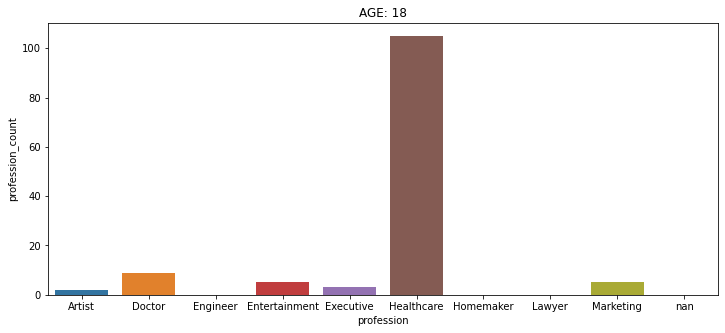

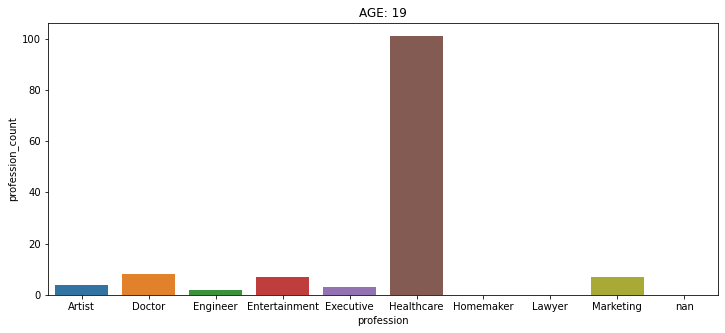

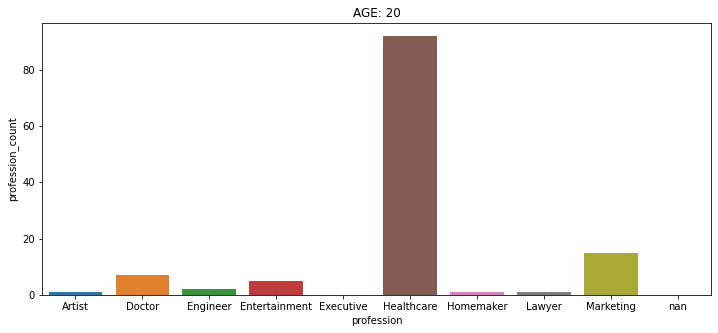

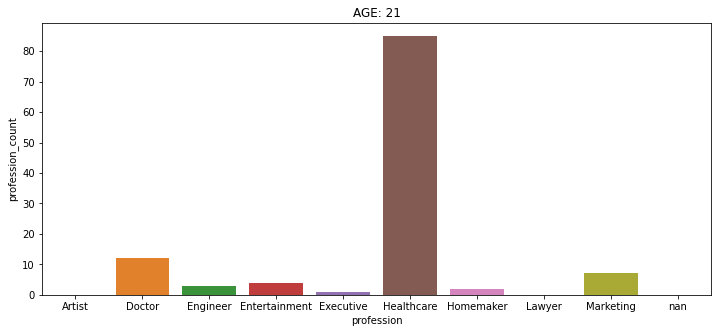

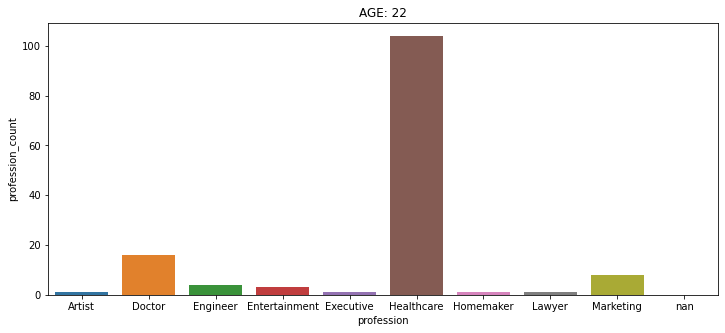

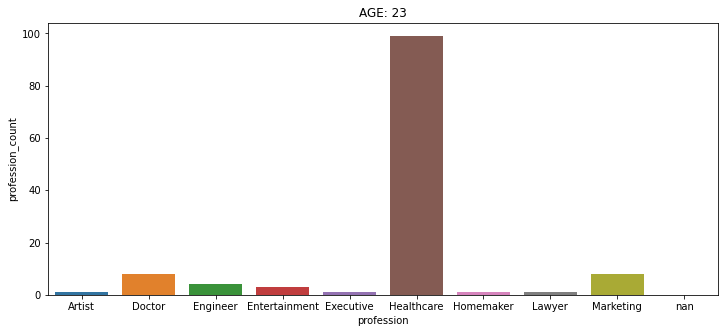

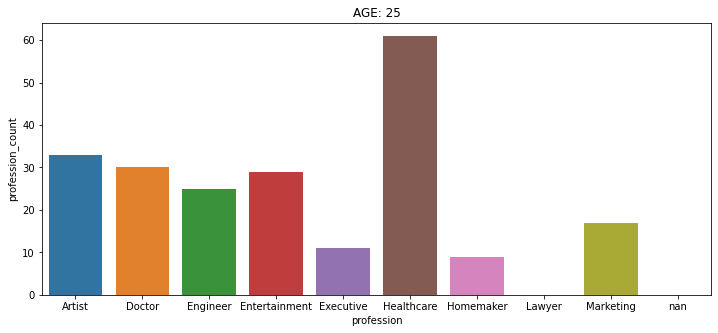

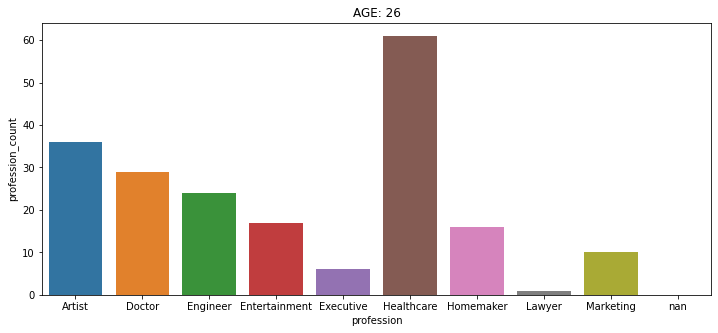

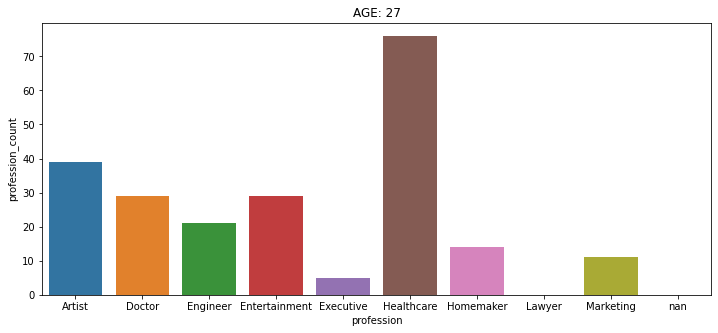

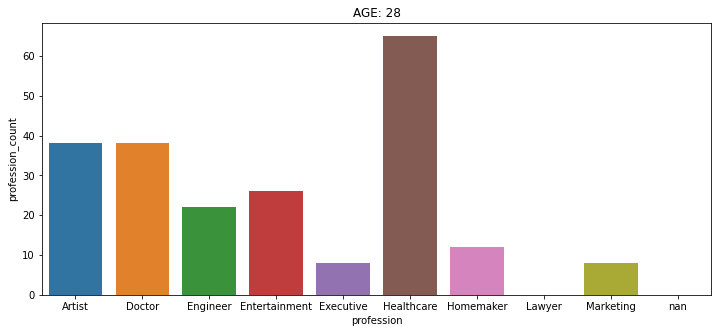

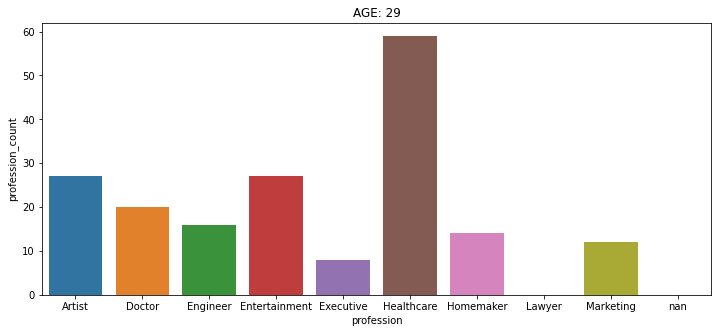

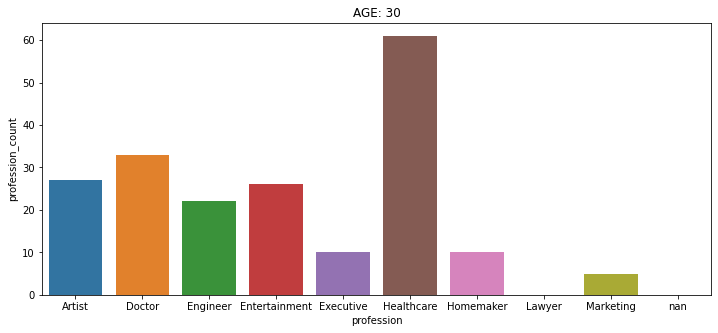

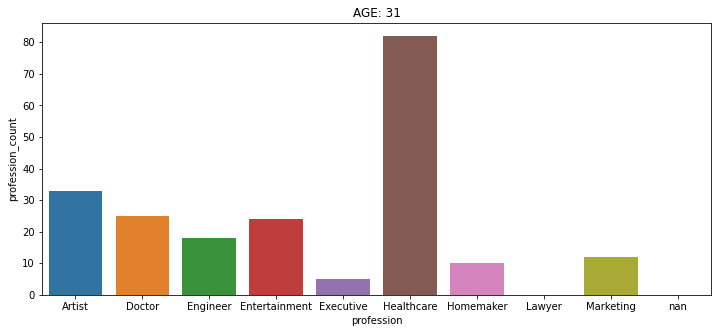

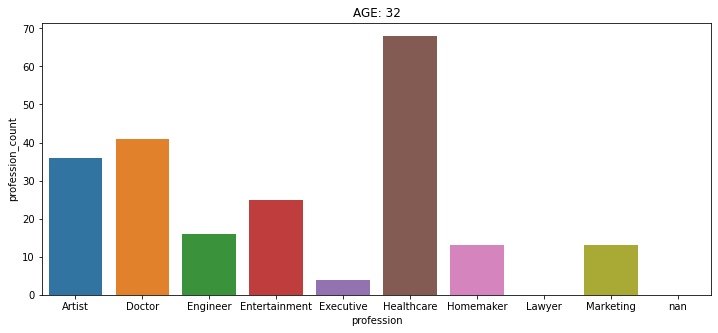

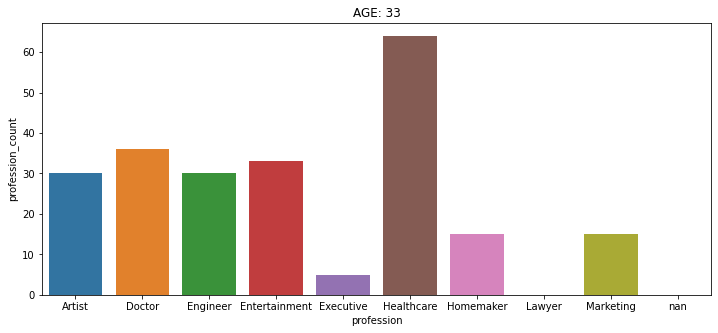

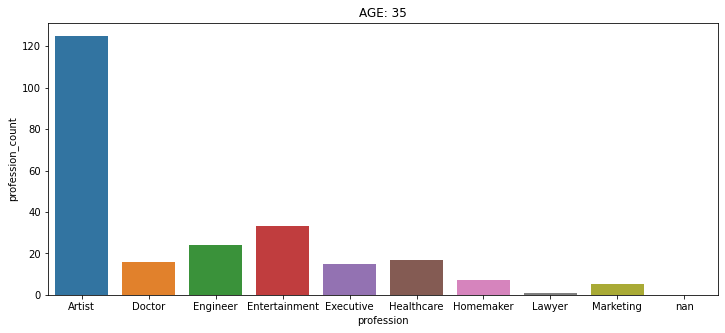

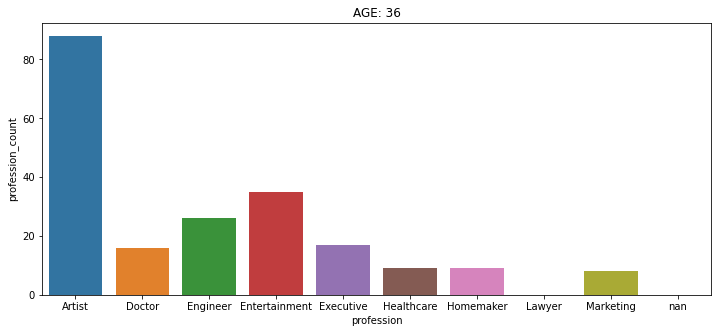

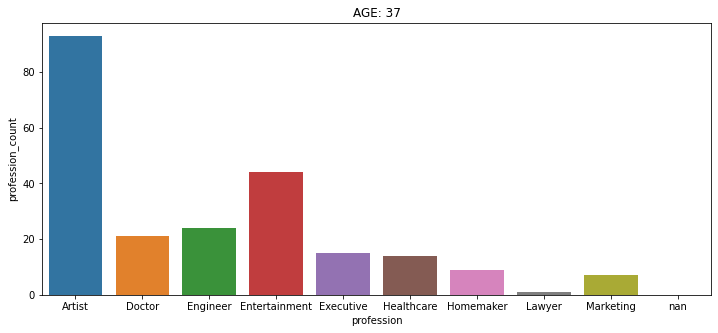

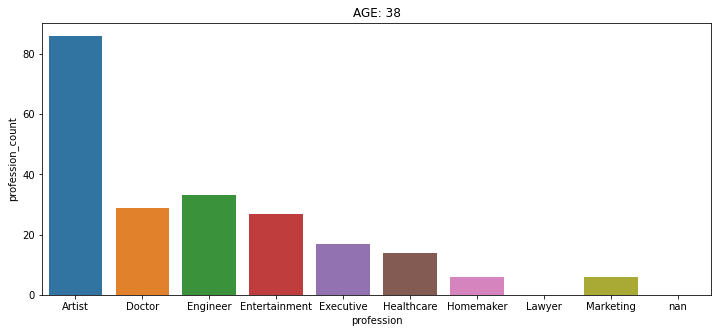

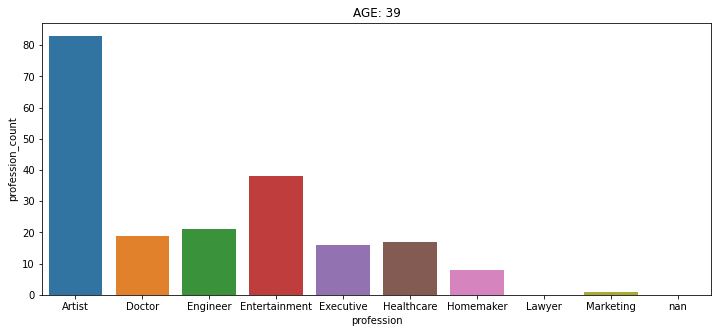

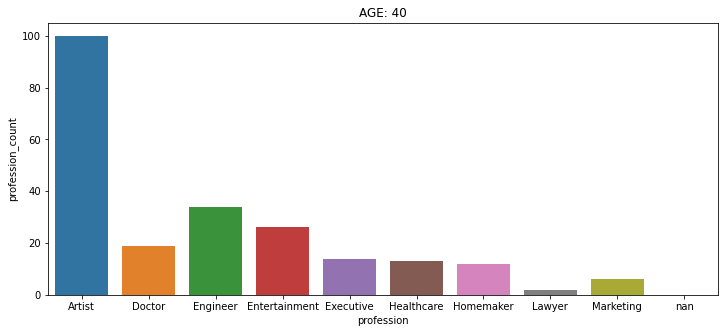

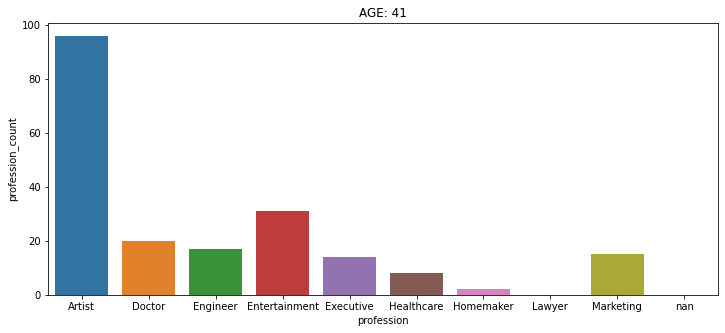

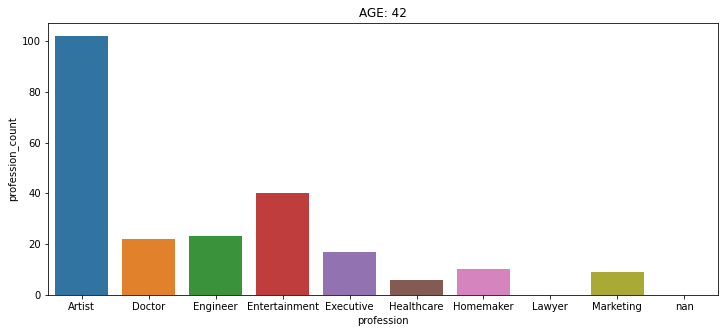

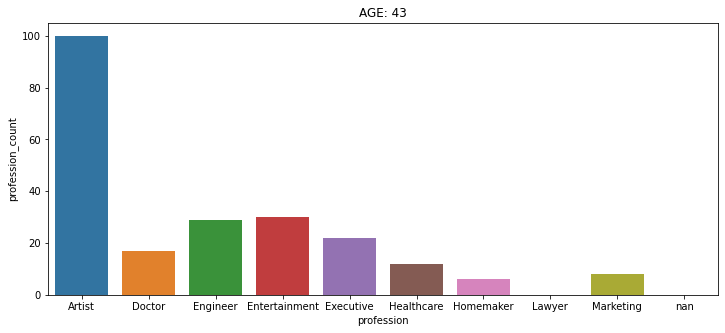

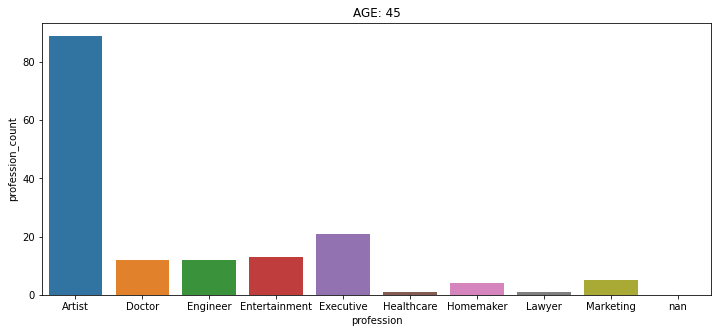

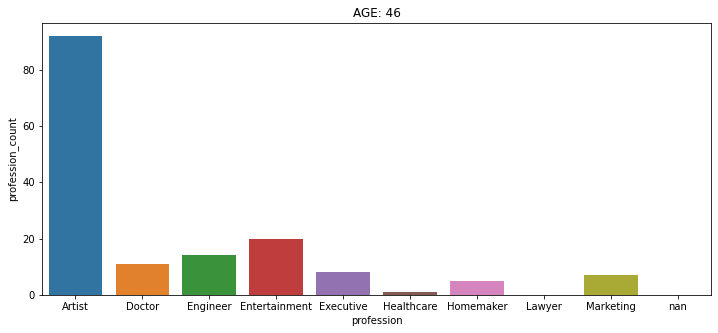

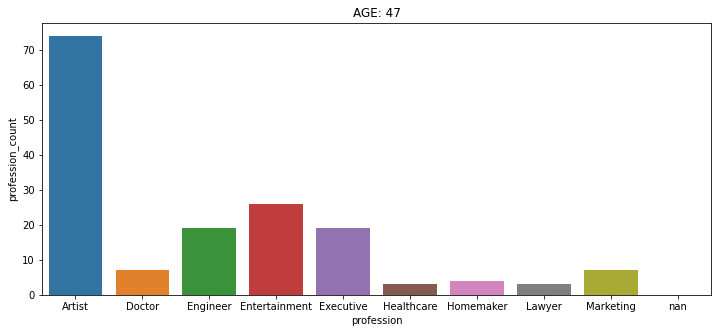

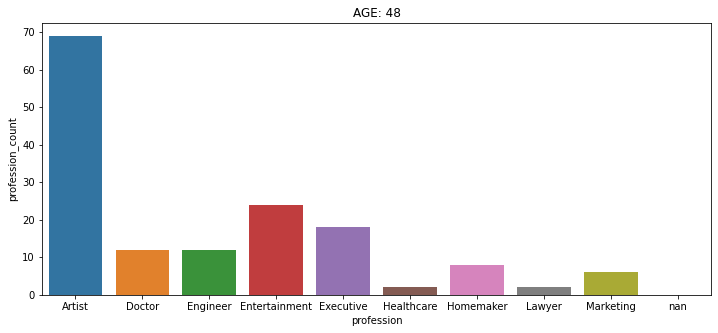

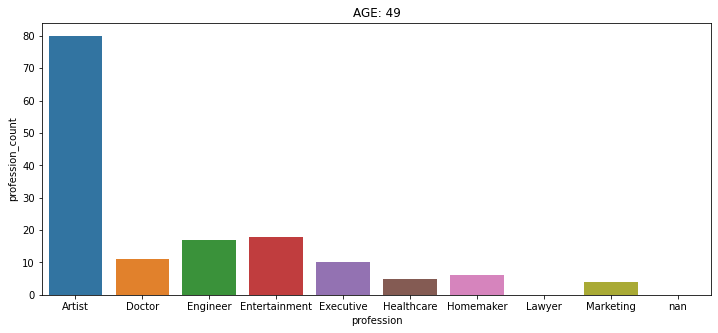

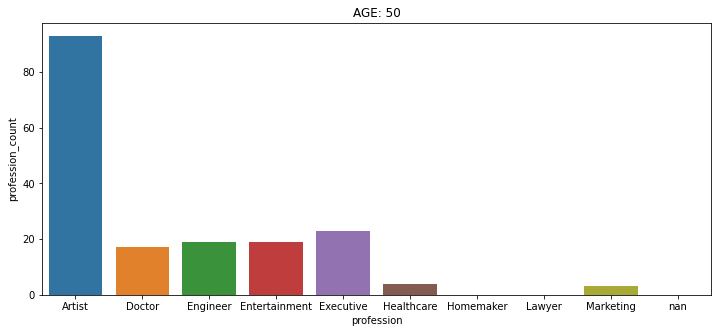

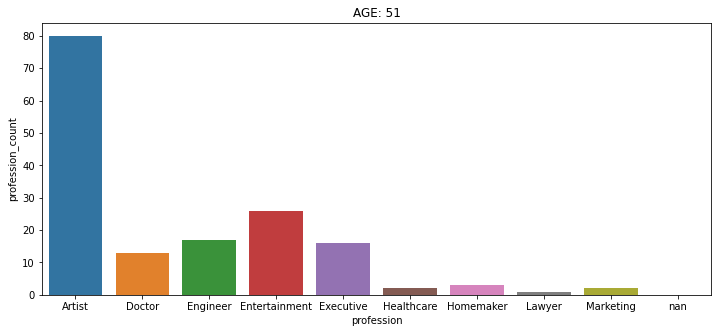

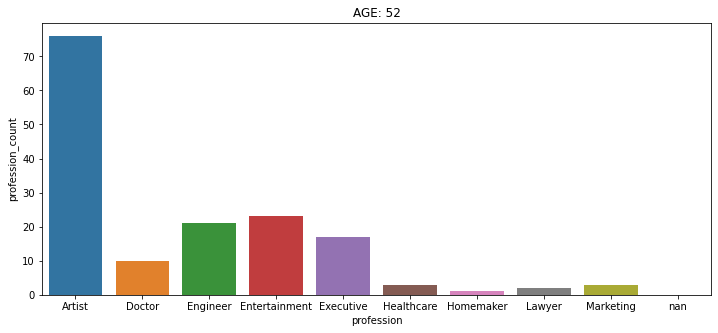

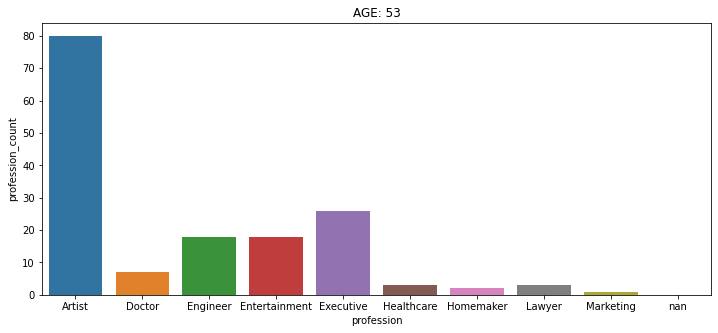

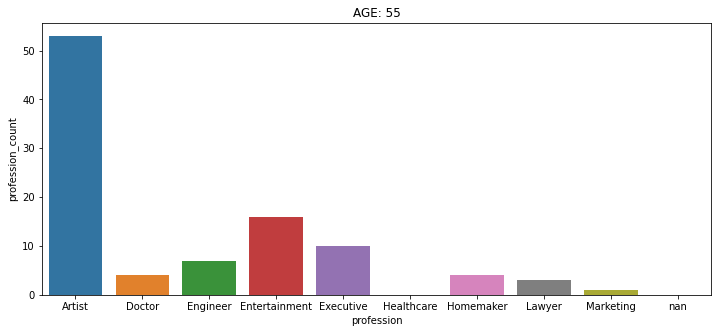

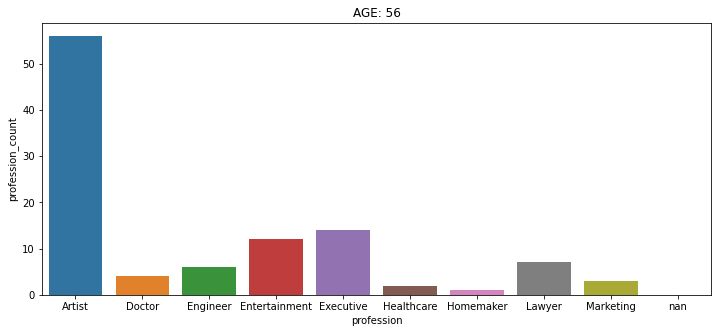

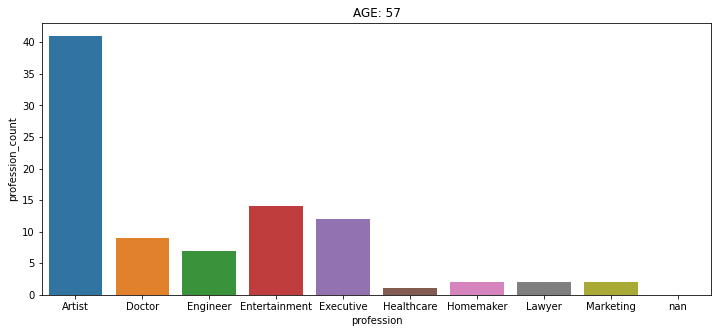

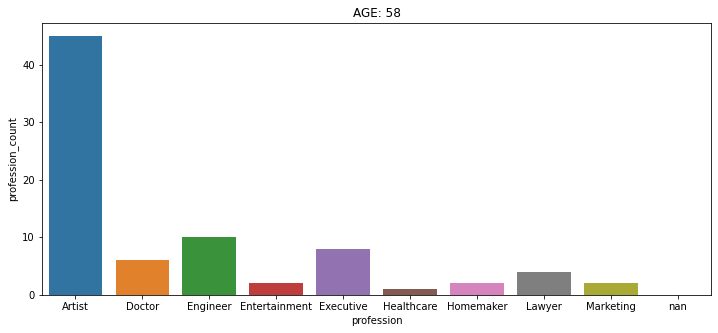

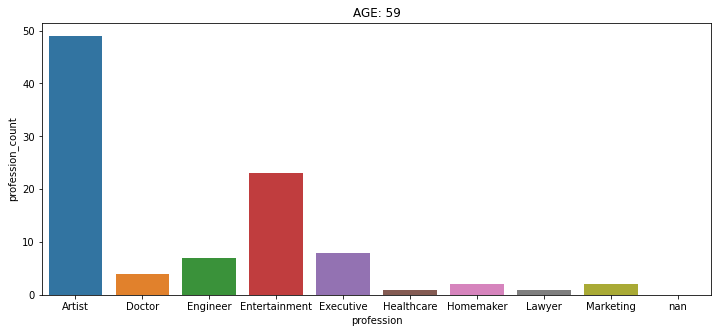

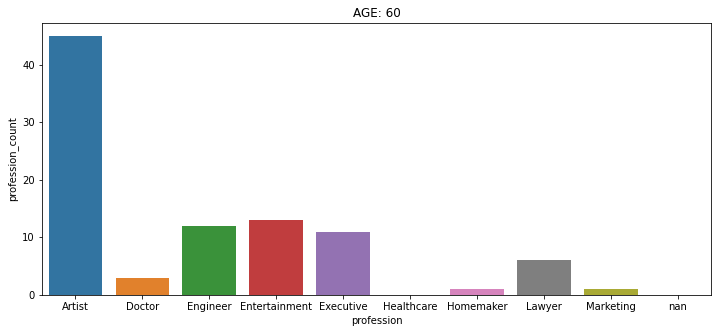

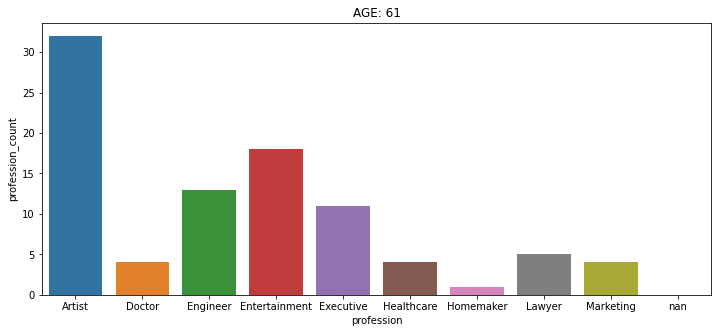

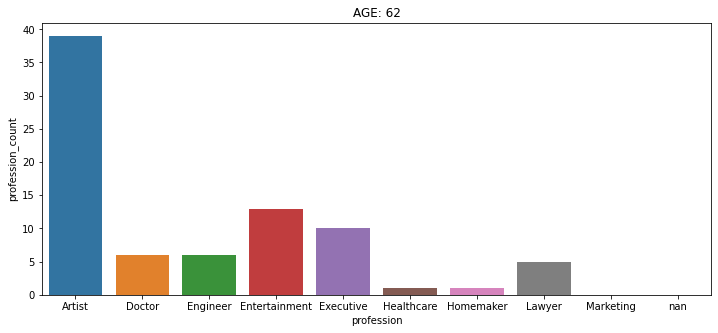

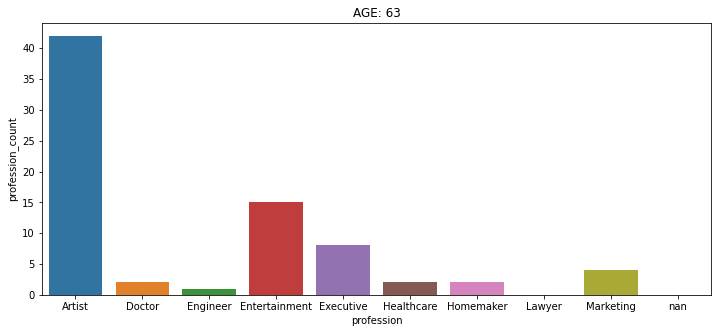

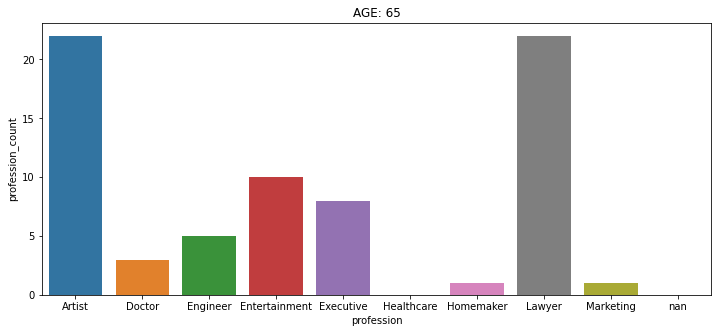

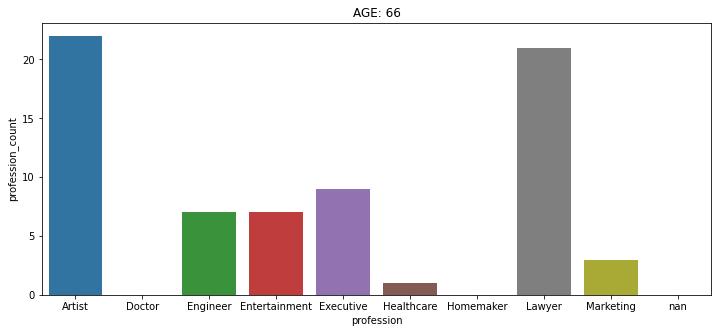

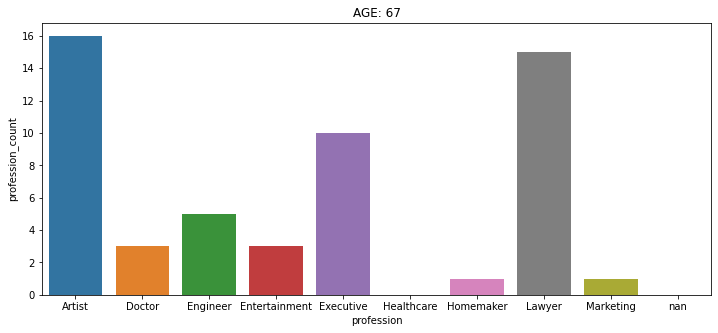

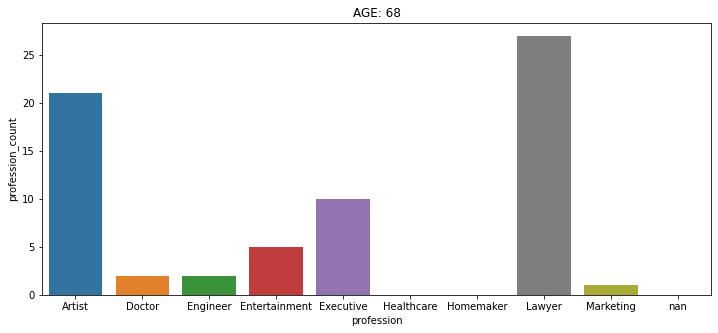

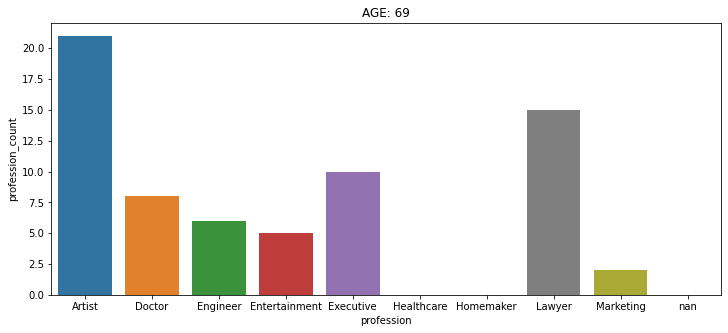

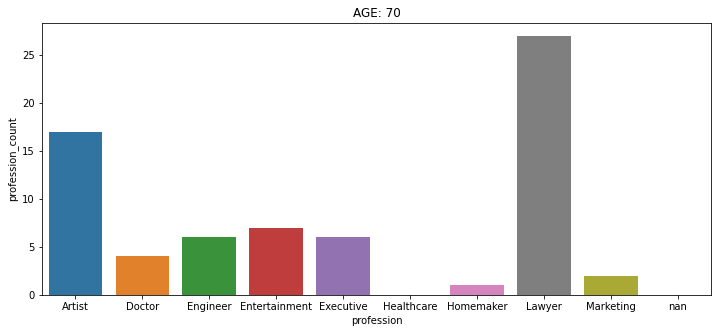

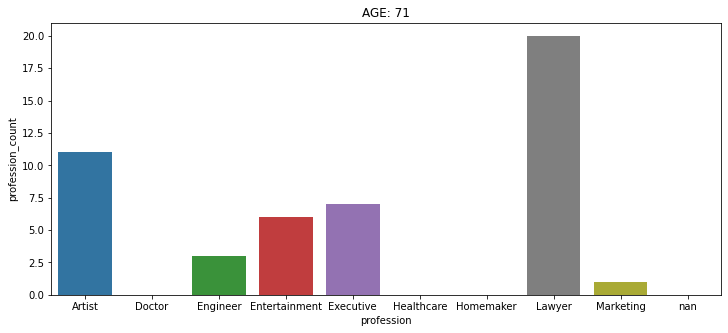

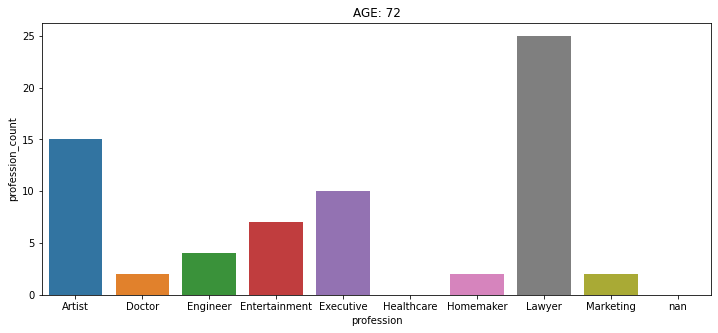

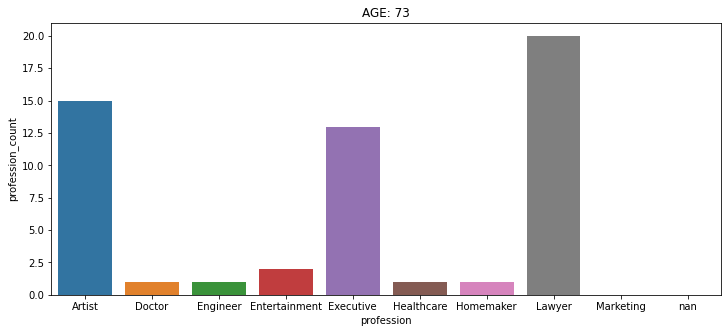

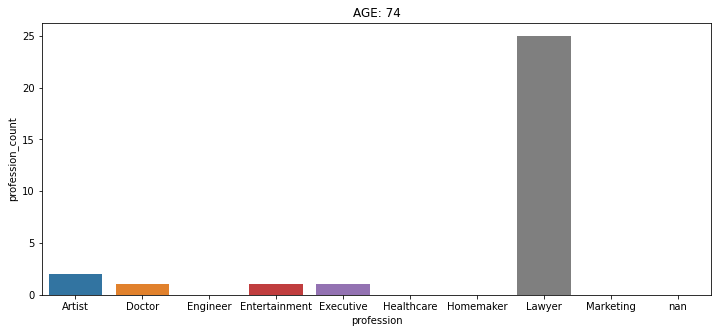

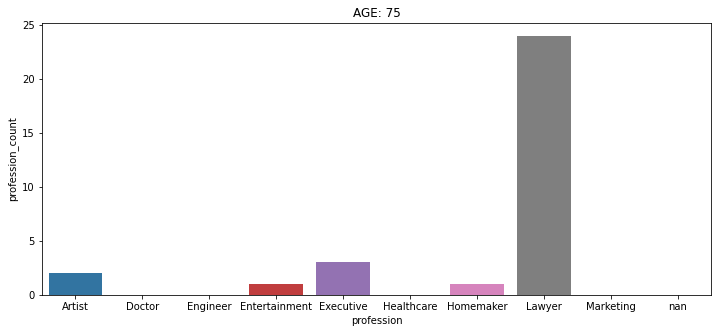

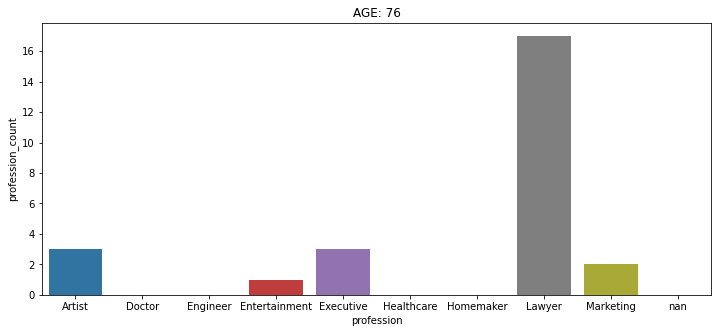

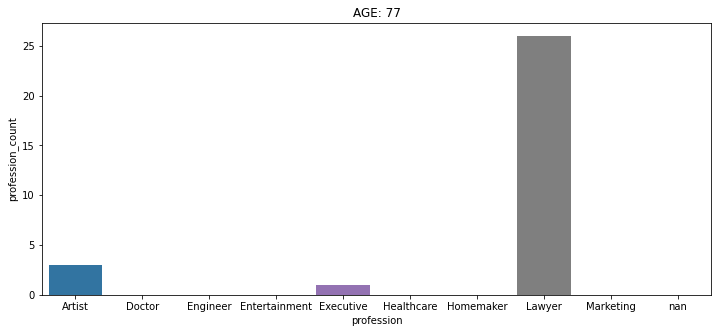

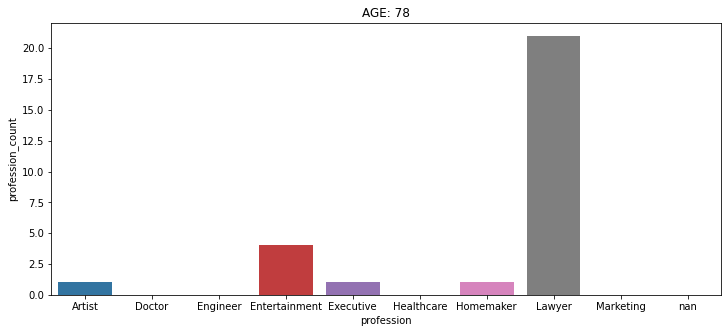

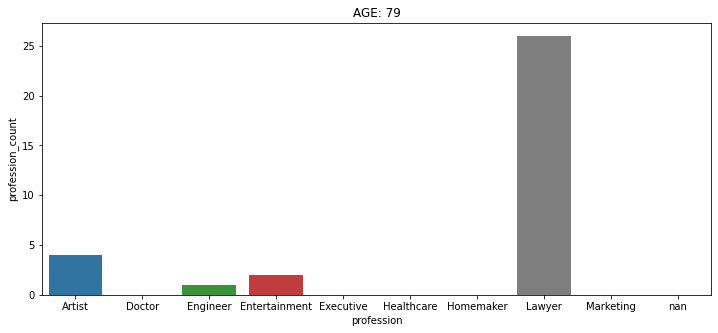

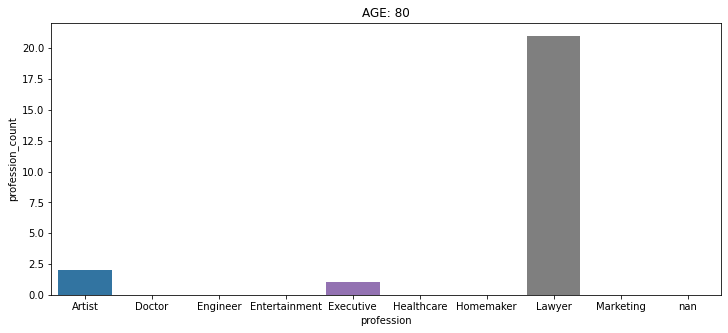

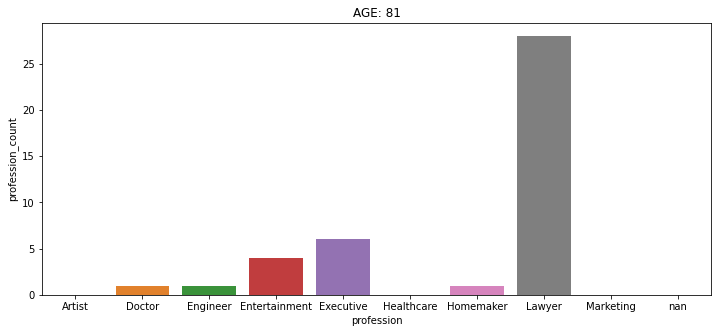

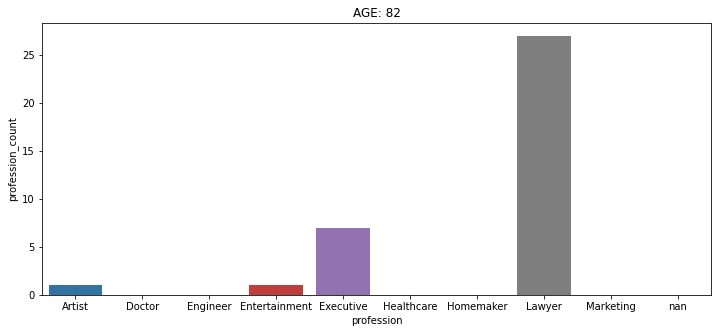

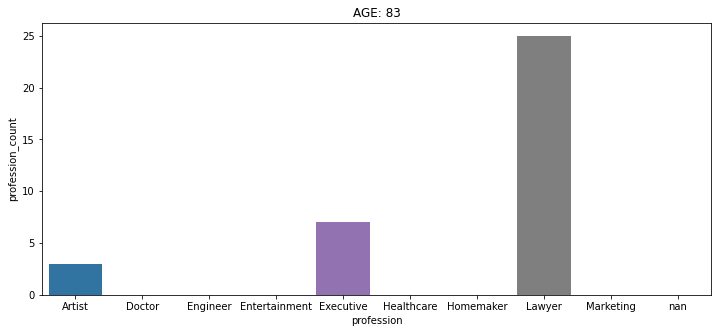

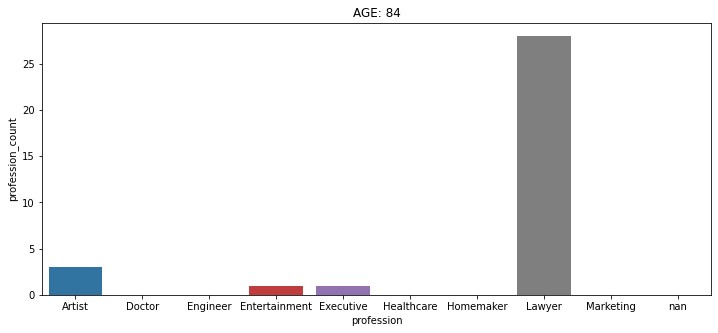

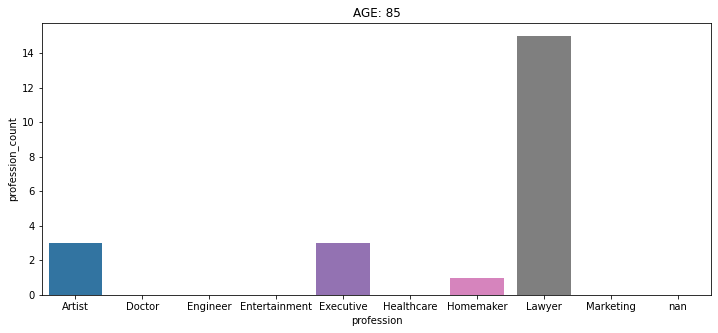

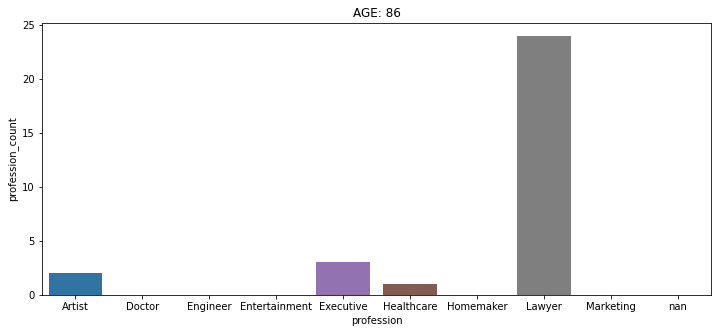

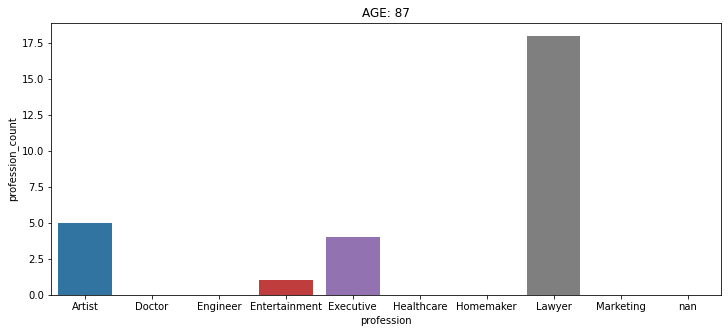

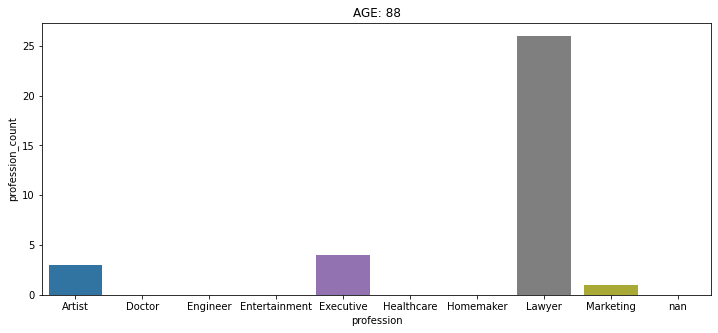

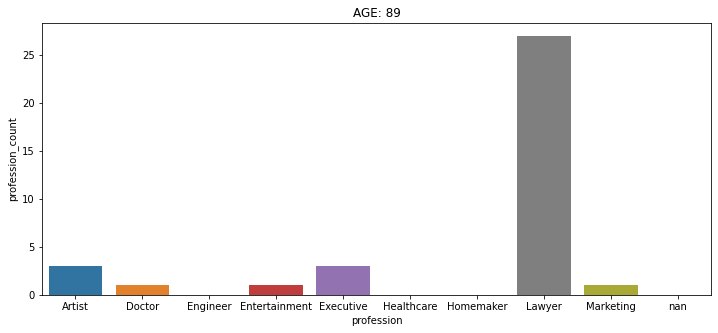

In [9]:
all_professions = list(set([str(i) for i in set(df_train["Profession"].tolist())]))
all_professions.sort()
for index, group in enumerate(df_train.groupby(["Age"])):
    professions = Counter(group[1]["Profession"].tolist())
    vals = [professions[profession] for profession in all_professions]
    df = pd.DataFrame({"profession_count" : vals, "profession" : all_professions})
    
    plt.figure(figsize=(12,5))
    sns.barplot("profession", "profession_count", data=df)
    plt.title("AGE: "+str(group[0]))
    plt.show()

In [10]:
for i in df_train.groupby(["Age"]):
    print(i[0])
    print(Counter(i[1]["Profession"].values))
    break

18
Counter({'Healthcare': 105, 'Doctor': 9, 'Marketing': 5, 'Entertainment': 5, 'Executive': 3, nan: 3, 'Artist': 2})


### Check the class distribution

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

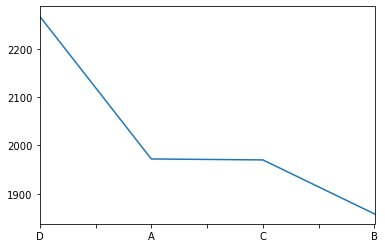

In [11]:
df_train["Segmentation"].value_counts(normalize=False).plot()

### Okay, now let's check out count of features based on the target variable

#### Gender

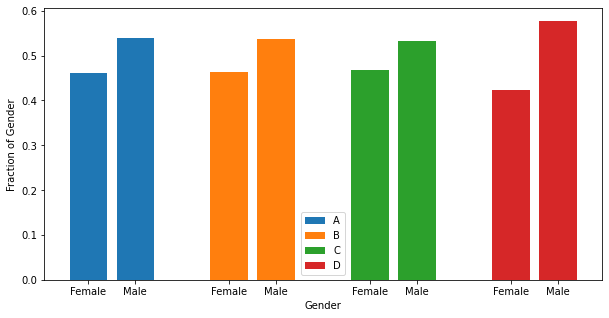

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
all_stuff = list(set(df_train["Gender"].dropna().tolist()))
all_stuff.sort()
final_x_axis1, final_x_axis2 = list(), list()
for index, group in enumerate(df_train.groupby(["Segmentation"])):
    tmp = group[1]["Gender"].value_counts()
    denom = sum(tmp)
    vals = [tmp[all_stuff[i]]/denom for i in range(len(all_stuff))]
    x_axis = np.arange((index*len(all_stuff))+1+index, ((index+1)*len(all_stuff))+1+index)
    plt.bar(x_axis, vals, label=group[0])
    
    final_x_axis1.extend(x_axis)
    final_x_axis2.extend(all_stuff)
    
plt.xticks(final_x_axis1, final_x_axis2)
plt.xlabel("Gender")
plt.ylabel("Fraction of Gender")
plt.legend()
plt.show()

#### Ever Married

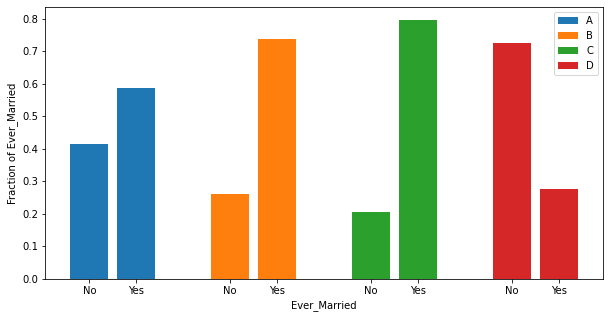

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
all_stuff = list(set(df_train["Ever_Married"].dropna().tolist()))
all_stuff.sort()
final_x_axis1, final_x_axis2 = list(), list()
for index, group in enumerate(df_train.groupby(["Segmentation"])):
    tmp = group[1]["Ever_Married"].value_counts()
    denom = sum(tmp)
    vals = [tmp[all_stuff[i]]/denom for i in range(len(all_stuff))]
    x_axis = np.arange((index*len(all_stuff))+1+index, ((index+1)*len(all_stuff))+1+index)
    plt.bar(x_axis, vals, label=group[0])
    
    final_x_axis1.extend(x_axis)
    final_x_axis2.extend(all_stuff)
    
plt.xticks(final_x_axis1, final_x_axis2)
plt.xlabel("Ever_Married")
plt.ylabel("Fraction of Ever_Married")
plt.legend()
plt.show()

#### Graduated

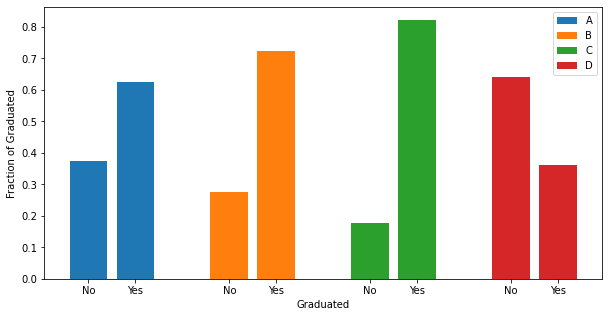

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
all_stuff = list(set(df_train["Graduated"].dropna().tolist()))
all_stuff.sort()
final_x_axis1, final_x_axis2 = list(), list()
for index, group in enumerate(df_train.groupby(["Segmentation"])):
    tmp = group[1]["Graduated"].value_counts()
    denom = sum(tmp)
    vals = [tmp[all_stuff[i]]/denom for i in range(len(all_stuff))]
    x_axis = np.arange((index*len(all_stuff))+1+index, ((index+1)*len(all_stuff))+1+index)
    plt.bar(x_axis, vals, label=group[0])
    
    final_x_axis1.extend(x_axis)
    final_x_axis2.extend(all_stuff)
    
plt.xticks(final_x_axis1, final_x_axis2)
plt.xlabel("Graduated")
plt.ylabel("Fraction of Graduated")
plt.legend()
plt.show()
# Graduated and Ever Married look awefully similar. Will have to check out their correlations later

#### Spending Score

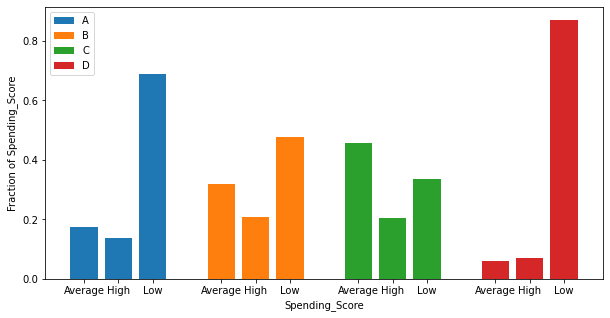

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
all_stuff = list(set(df_train["Spending_Score"].dropna().tolist()))
all_stuff.sort()
final_x_axis1, final_x_axis2 = list(), list()
for index, group in enumerate(df_train.groupby(["Segmentation"])):
    tmp = group[1]["Spending_Score"].value_counts()
    denom = sum(tmp)
    vals = [tmp[all_stuff[i]]/denom for i in range(len(all_stuff))]
    x_axis = np.arange((index*len(all_stuff))+1+index, ((index+1)*len(all_stuff))+1+index)
    plt.bar(x_axis, vals, label=group[0])
    
    final_x_axis1.extend(x_axis)
    final_x_axis2.extend(all_stuff)
    
plt.xticks(final_x_axis1, final_x_axis2)
plt.xlabel("Spending_Score")
plt.ylabel("Fraction of Spending_Score")
plt.legend()
plt.show()

#### Age

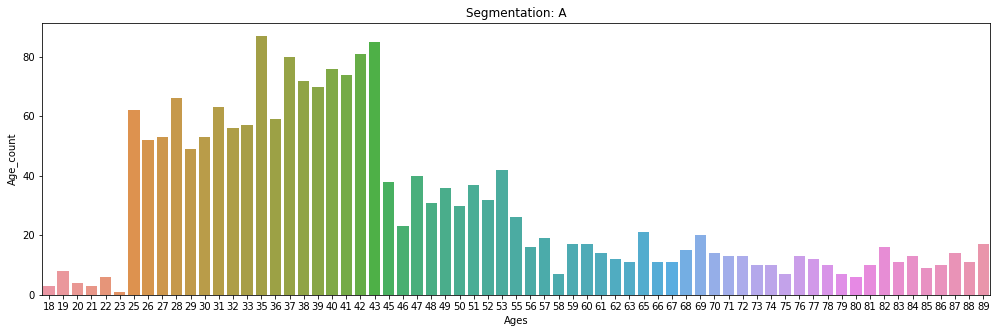

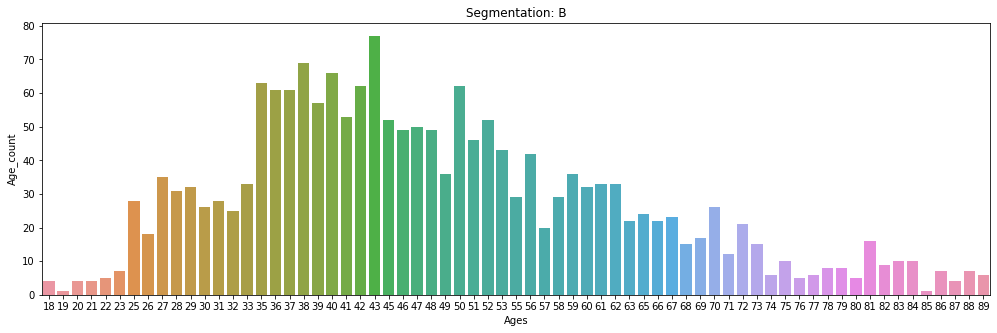

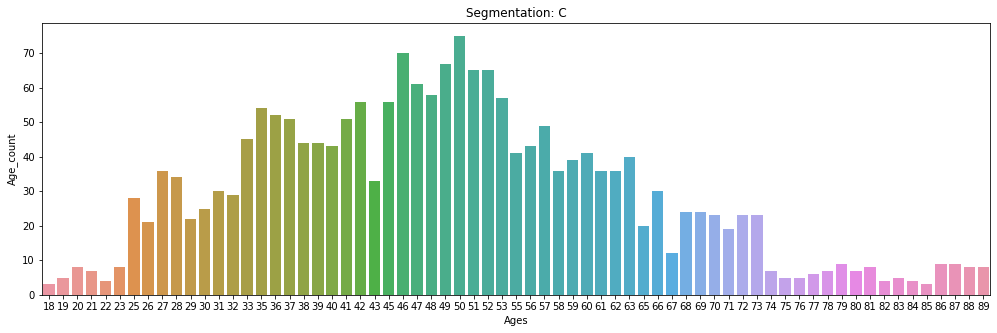

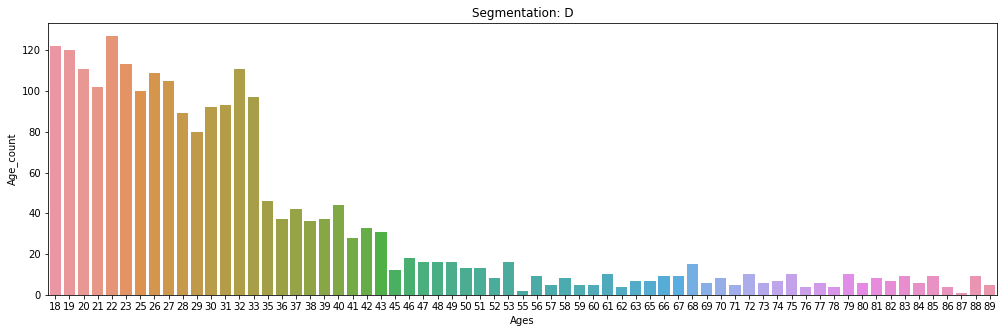

In [16]:
all_stuff = list(set(df_train["Age"].dropna().tolist()))
all_stuff.sort()
for index, group in enumerate(df_train.groupby(["Segmentation"])):
    ages = Counter(group[1]["Age"].tolist())
    vals = [ages[age] for age in all_stuff]
    df = pd.DataFrame({"Age_count" : vals, "Ages" : all_stuff})
    
    plt.figure(figsize=(17,5))
    sns.barplot("Ages", "Age_count", data=df)
    plt.title("Segmentation: "+str(group[0]))
    plt.show()

#### Profession

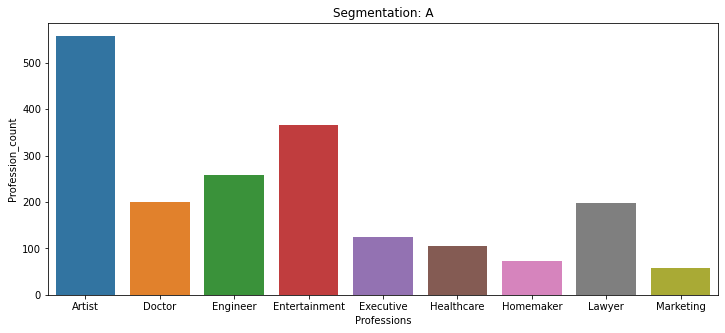

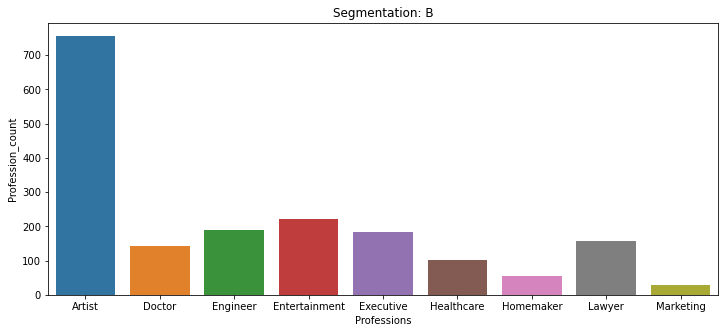

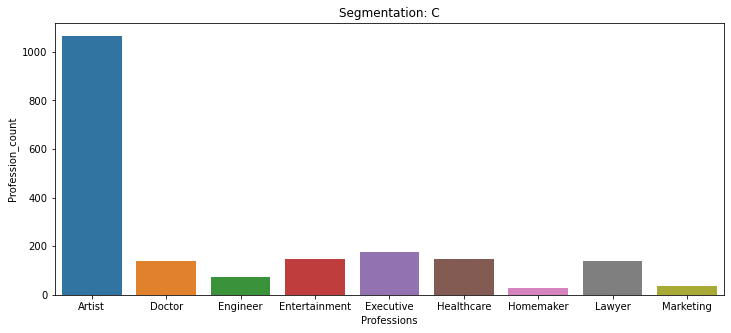

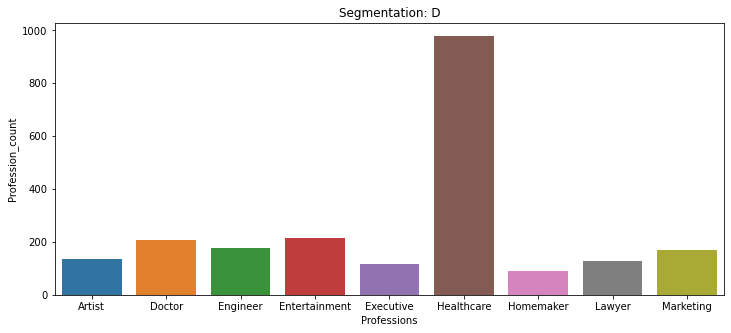

In [17]:
all_stuff = list(set(df_train["Profession"].dropna().tolist()))
all_stuff.sort()
for index, group in enumerate(df_train.groupby(["Segmentation"])):
    professions = Counter(group[1]["Profession"].tolist())
    vals = [professions[profession] for profession in all_stuff]
    df = pd.DataFrame({"Profession_count" : vals, "Professions" : all_stuff})
    
    plt.figure(figsize=(12,5))
    sns.barplot("Professions", "Profession_count", data=df)
    plt.title("Segmentation: "+str(group[0]))
    plt.show()

#### Family_Size

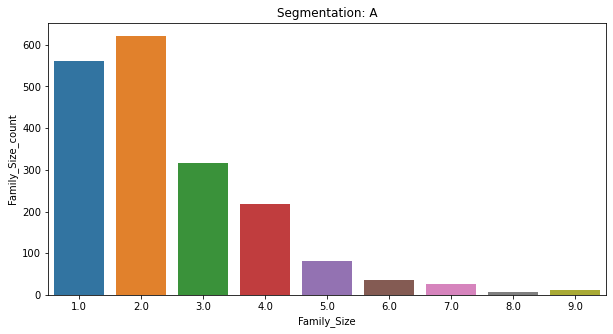

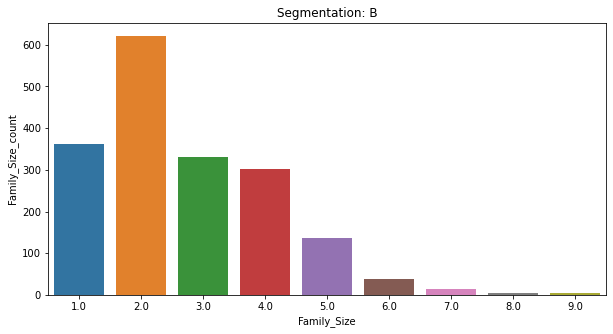

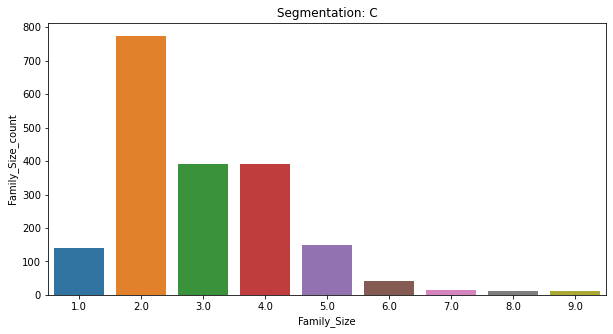

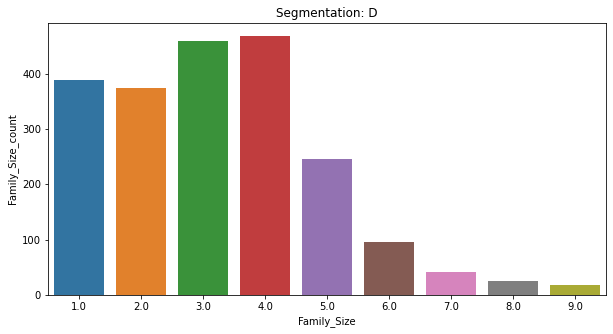

In [18]:
all_stuff = list(set(df_train["Family_Size"].dropna().tolist()))
all_stuff.sort()
for index, group in enumerate(df_train.groupby(["Segmentation"])):
    family_size = Counter(group[1]["Family_Size"].tolist())
    vals = [family_size[members] for members in all_stuff]
    df = pd.DataFrame({"Family_Size_count" : vals, "Family_Size" : all_stuff})
    
    plt.figure(figsize=(10,5))
    sns.barplot("Family_Size", "Family_Size_count", data=df)
    plt.title("Segmentation: "+str(group[0]))
    plt.show()

#### Var_1

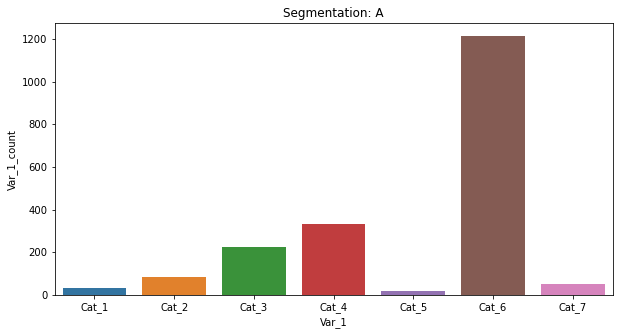

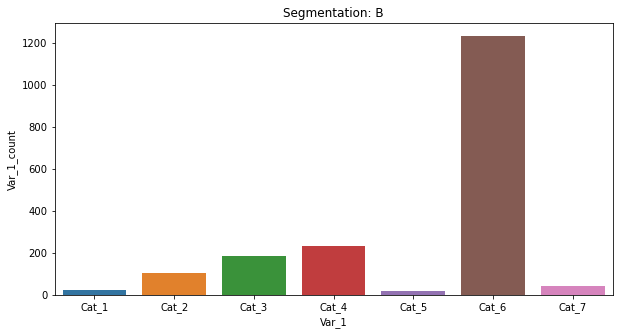

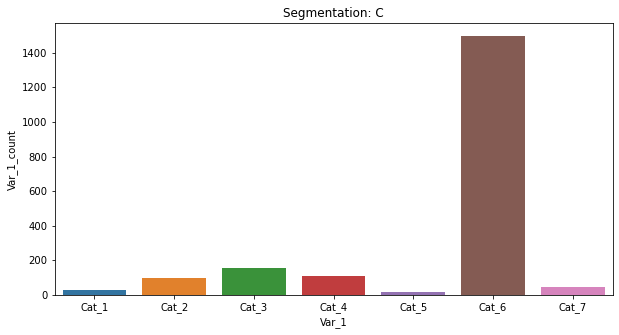

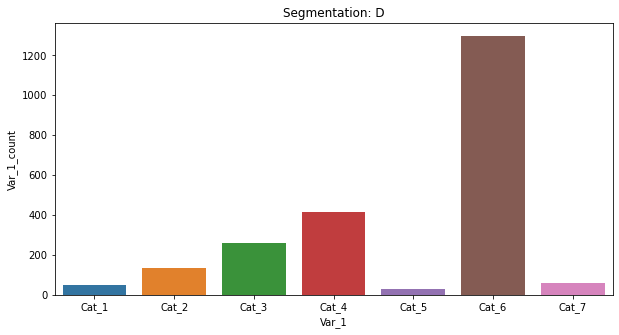

In [19]:
all_stuff = list(set(df_train["Var_1"].dropna().tolist()))
all_stuff.sort()
for index, group in enumerate(df_train.groupby(["Segmentation"])):
    var_1 = Counter(group[1]["Var_1"].tolist())
    vals = [var_1[count] for count in all_stuff]
    df = pd.DataFrame({"Var_1_count" : vals, "Var_1" : all_stuff})
    
    plt.figure(figsize=(10,5))
    sns.barplot("Var_1", "Var_1_count", data=df)
    plt.title("Segmentation: "+str(group[0]))
    plt.show()

In [ ]:
# If married is yes and the person is old and num_family is 1, then there have been deaths in the family. Count number of deaths